In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train=pd.read_csv("Train.csv")

In [12]:
y_train=df_train.Attrition_rate

In [6]:
df_train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [19]:
num_train=df_train.select_dtypes(exclude='object')

In [20]:
num_train.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [21]:
for i in list(num_train.columns):
    num_train[i]=num_train[i].fillna(num_train[i].mean())

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
num_train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.200357,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,1.121904,0.836377,0.948171,0.986933,0.503983,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,1.891078,2.000000,6.000000,3.000000,0.070400
50%,39.622799,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.008126,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [23]:
num_corr=num_train.corr().iloc[0:-1,-1]

In [24]:
print(num_corr)

Age                    -0.015086
Education_Level        -0.008143
Time_of_service        -0.016213
Time_since_promotion    0.013880
growth_rate             0.014247
Travel_Rate            -0.012608
Post_Level              0.016402
Pay_Scale              -0.015221
Work_Life_balance       0.020738
VAR1                   -0.008073
VAR2                   -0.022895
VAR3                    0.001245
VAR4                   -0.012576
VAR5                   -0.004770
VAR6                   -0.003130
VAR7                   -0.015299
Name: Attrition_rate, dtype: float64


In [27]:
var_train=df_train.select_dtypes(include='object')

In [28]:
var_train.describe()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000,7000,7000,7000,7000,7000,7000
unique,7000,2,2,5,12,4,5
top,EID_22898,F,Married,Lebanon,IT,Conceptual,type2
freq,1,4114,4520,2070,1394,1756,3945


In [29]:
var_train=var_train.drop(['Employee_ID'],axis=1)

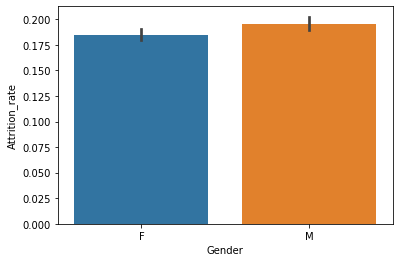

In [30]:
sns.barplot(x='Gender',y='Attrition_rate',data=df_train)

In [35]:
"""MEN ARE MORE LIKELY TO LEAVE THAN WOMEN EVEN THO FREQ IS LESS F-59%. MEN-1 WOMEN-0"""

'MEN ARE MORE LIKELY TO LEAVE THAN WOMEN EVEN THO FREQ IS LESS F-59%. MEN-1 WOMEN-0'

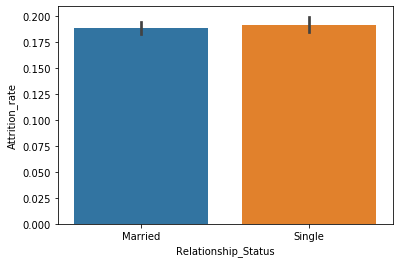

In [33]:
sns.barplot(x='Relationship_Status',y='Attrition_rate',data=df_train)

In [34]:
"""SINGLE ARE MORE LIKELY TO LEAVE. NO. OF SINGLE-35% AND YET BAR CHART ARE EQUAL"""

'SINGLE ARE MORE LIKELY TO LEAVE. NO. OF SINGLE-35% AND YET BAR CHART ARE EQUAL'

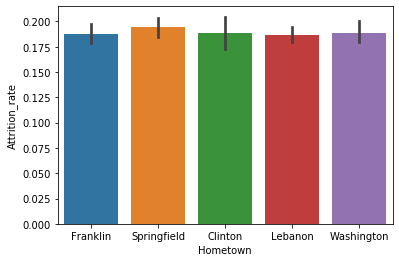

In [36]:
sns.barplot(x='Hometown',y='Attrition_rate',data=df_train)

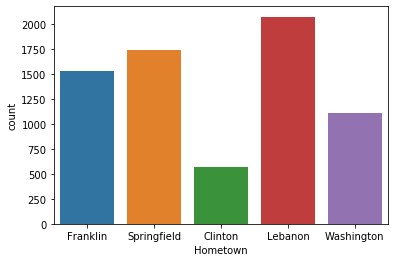

In [45]:
sns.countplot(df_train.Hometown)
labels = (df_train['Hometown'].value_counts())

In [47]:
#clintonhometown, washington are more likely to leave. lebanon no chance,leb-0,spring-1,frank-2,wash-3,clinton-4

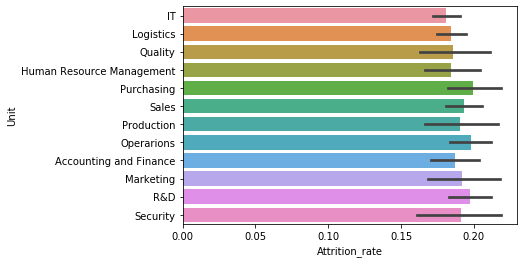

In [49]:
sns.barplot(x='Attrition_rate',y='Unit',data=df_train)

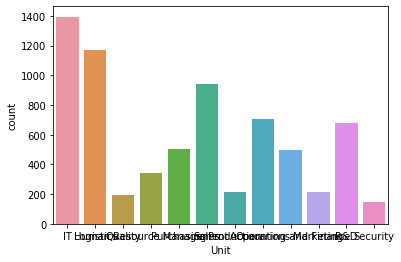

In [50]:
sns.countplot(df_train.Unit)
labels = (df_train['Unit'].value_counts())

In [51]:
#IT-0,security-11,quality-10,marketing-9, production-8,

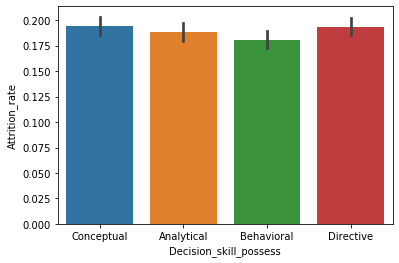

In [53]:
sns.barplot(x='Decision_skill_possess',y='Attrition_rate',data=df_train)

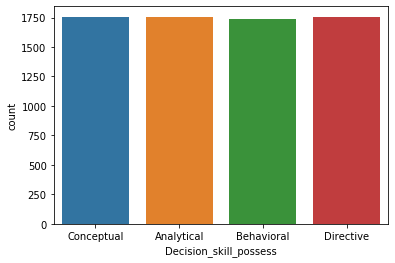

In [54]:
sns.countplot(df_train.Decision_skill_possess)
labels = (df_train['Decision_skill_possess'].value_counts())

In [55]:
#behavioral-0,analytical-1, conceptual -2 directive-3

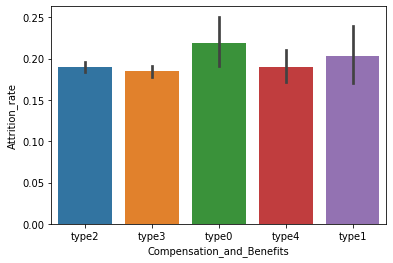

In [56]:
sns.barplot(x='Compensation_and_Benefits',y='Attrition_rate',data=df_train)

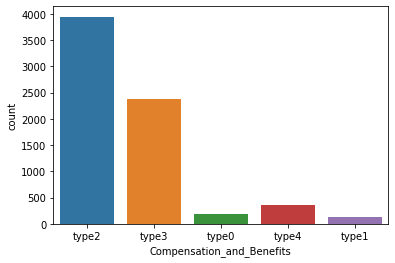

In [57]:
sns.countplot(df_train.Compensation_and_Benefits)
labels = (df_train['Compensation_and_Benefits'].value_counts())

In [58]:
#type2-0,type3-1,type4-2,type1-3,type0-4

In [60]:
var_train['Gender']=var_train['Gender'].replace('M',1)
var_train['Gender']=var_train['Gender'].replace('F',0)

In [61]:
var_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     7000 non-null   int64 
 1   Relationship_Status        7000 non-null   object
 2   Hometown                   7000 non-null   object
 3   Unit                       7000 non-null   object
 4   Decision_skill_possess     7000 non-null   object
 5   Compensation_and_Benefits  7000 non-null   object
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [63]:
var_train['Relationship_Status']=var_train['Relationship_Status'].replace('Married',0)
var_train['Relationship_Status']=var_train['Relationship_Status'].replace('Single',1)

In [64]:
var_train.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,Franklin,IT,Conceptual,type2
1,1,1,Springfield,Logistics,Analytical,type2
2,0,0,Clinton,Quality,Conceptual,type2
3,0,1,Lebanon,Human Resource Management,Behavioral,type2
4,0,0,Springfield,Logistics,Conceptual,type3


In [65]:
var_train['Hometown']=var_train['Hometown'].replace('Lebanon',0)
var_train['Hometown']=var_train['Hometown'].replace('Springfield',1)
var_train['Hometown']=var_train['Hometown'].replace('Franklin',2)
var_train['Hometown']=var_train['Hometown'].replace('Washington',3)
var_train['Hometown']=var_train['Hometown'].replace('Clinton',4)

In [66]:
var_train.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,2,IT,Conceptual,type2
1,1,1,1,Logistics,Analytical,type2
2,0,0,4,Quality,Conceptual,type2
3,0,1,0,Human Resource Management,Behavioral,type2
4,0,0,1,Logistics,Conceptual,type3


In [78]:
var_train['Unit']=var_train['Unit'].replace('IT',0)
var_train['Unit']=var_train['Unit'].replace('Logistics',1)
var_train['Unit']=var_train['Unit'].replace('Sales',2)
var_train['Unit']=var_train['Unit'].replace('Operations',3)
var_train['Unit']=var_train['Unit'].replace('Operarions',3)
var_train['Unit']=var_train['Unit'].replace('R&D',4)
var_train['Unit']=var_train['Unit'].replace('Accounting and Finance',5)
var_train['Unit']=var_train['Unit'].replace('Human Resource Management',6)
var_train['Unit']=var_train['Unit'].replace('Purchasing',7)
var_train['Unit']=var_train['Unit'].replace('Production',8)
var_train['Unit']=var_train['Unit'].replace('Marketing',9)
var_train['Unit']=var_train['Unit'].replace('Quality',10)
var_train['Unit']=var_train['Unit'].replace('Security',11)

In [68]:
var_train.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,2,0,Conceptual,type2
1,1,1,1,1,Analytical,type2
2,0,0,4,10,Conceptual,type2
3,0,1,0,6,Behavioral,type2
4,0,0,1,1,Conceptual,type3


In [69]:
var_train['Decision_skill_possess']=var_train['Decision_skill_possess'].replace('Behavioral',0)
var_train['Decision_skill_possess']=var_train['Decision_skill_possess'].replace('Analytical',1)
var_train['Decision_skill_possess']=var_train['Decision_skill_possess'].replace('Conceptual',2)
var_train['Decision_skill_possess']=var_train['Decision_skill_possess'].replace('Directive',3)

In [71]:
var_train['Compensation_and_Benefits']=var_train['Compensation_and_Benefits'].replace('type2',0)
var_train['Compensation_and_Benefits']=var_train['Compensation_and_Benefits'].replace('type3',1)
var_train['Compensation_and_Benefits']=var_train['Compensation_and_Benefits'].replace('type4',2)
var_train['Compensation_and_Benefits']=var_train['Compensation_and_Benefits'].replace('type1',3)
var_train['Compensation_and_Benefits']=var_train['Compensation_and_Benefits'].replace('type0',4)

In [72]:
var_train.head()


,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0,0,2,0,2,0
1,1,1,1,1,1,0
2,0,0,4,10,2,0
3,0,1,0,6,0,0
4,0,0,1,1,2,1


In [79]:
print(var_train.Unit)

0        0
1        1
2       10
3        6
4        1
        ..
6995     3
6996     4
6997     0
6998     2
6999     0
Name: Unit, Length: 7000, dtype: int64


In [80]:
var_train.describe()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,0.354286,1.480000,3.297000,1.503714,0.605000
std,0.492281,0.478330,1.281229,2.999441,1.116701,0.880065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,1.000000,1.000000,2.000000,5.000000,3.000000,1.000000
max,1.000000,1.000000,4.000000,11.000000,3.000000,4.000000


In [81]:
num_train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.200357,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,1.121904,0.836377,0.948171,0.986933,0.503983,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,1.891078,2.000000,6.000000,3.000000,0.070400
50%,39.622799,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.008126,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [82]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

In [108]:
fs = SelectKBest(score_func=f_regression, k='all')

In [110]:
num_train=num_train.drop(['Attrition_rate'],axis=1)

KeyError: "['Attrition_rate'] not found in axis"

In [111]:
var_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     7000 non-null   int64
 1   Relationship_Status        7000 non-null   int64
 2   Hometown                   7000 non-null   int64
 3   Unit                       7000 non-null   int64
 4   Decision_skill_possess     7000 non-null   int64
 5   Compensation_and_Benefits  7000 non-null   int64
dtypes: int64(6)
memory usage: 328.2 KB


In [90]:
features=pd.concat([num_train,var_train],axis=1)

In [91]:
features.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,VAR4,VAR5,VAR6,VAR7,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,...,1.891078,2.834143,7.101286,3.257000,0.412286,0.354286,1.480000,3.297000,1.503714,0.605000
std,13.200357,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,1.121904,0.836377,...,0.503983,0.938945,1.164262,0.925319,0.492281,0.478330,1.281229,2.999441,1.116701,0.880065
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,...,1.891078,2.000000,6.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.622799,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,...,2.000000,3.000000,7.000000,3.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,...,2.000000,3.000000,8.000000,4.000000,1.000000,1.000000,2.000000,5.000000,3.000000,1.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,...,3.000000,5.000000,9.000000,5.000000,1.000000,1.000000,4.000000,11.000000,3.000000,4.000000


In [112]:
xtrain=fs.fit_transform(features,y_train)

In [114]:
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features.columns[i], fs.scores_[i]))

Feature Age: 1.593006
Feature Education_Level: 0.464089
Feature Time_of_service: 1.839976
Feature Time_since_promotion: 1.348465
Feature growth_rate: 1.420629
Feature Travel_Rate: 1.112608
Feature Post_Level: 1.883242
Feature Pay_Scale: 1.621625
Feature Work_Life_balance: 3.010840
Feature VAR1: 0.456138
Feature VAR2: 3.670038
Feature VAR3: 0.010851
Feature VAR4: 1.107007
Feature VAR5: 0.159197
Feature VAR6: 0.068559
Feature VAR7: 1.638352
Feature Gender: 5.706395
Feature Relationship_Status: 0.580407
Feature Hometown: 0.000001
Feature Unit: 1.871154
Feature Decision_skill_possess: 5.371015
Feature Compensation_and_Benefits: 1.606540


In [117]:
#selecting 10 strongest features- Gender,Decision_skill_possess,VAR2,Work_Life_Balance,Post_Level,Unit,Time_of_service,VAR7,Pay_Scale,Compensation_and_Benefits

In [124]:
feat=['Gender','Decision_skill_possess','VAR2','Work_Life_balance',
      'Post_Level','Unit','Time_of_service','VAR7','Pay_Scale','Compensation_and_Benefits']

In [125]:
xtrain=features[feat]

In [126]:
xtrain.head()

,Gender,Decision_skill_possess,VAR2,Work_Life_balance,Post_Level,Unit,Time_of_service,VAR7,Pay_Scale,Compensation_and_Benefits
0,0,2,0.7516,3.0,1,0,4.0,3,7.0,0
1,1,1,-0.9612,4.0,3,1,5.0,3,6.0,0
2,0,2,-0.9612,1.0,2,10,27.0,3,8.0,0
3,0,0,-1.8176,1.0,3,6,4.0,3,8.0,0
4,0,2,0.7516,3.0,3,1,5.0,2,2.0,1


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
sc=StandardScaler()

In [131]:
xtrain=sc.fit_transform(xtrain)

In [132]:
from sklearn.ensemble import StackingRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [136]:
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level0.append(('LASSOCV', LassoCV()))
level0.append(('ridgecv', RidgeCV()))
level0.append(('randomforest', RandomForestRegressor()))
level1 = LinearRegression()

In [137]:
model=StackingRegressor(estimators=level0, final_estimator=level1, cv=10)

In [141]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, y_train,scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

In [143]:
print(scores.mean())

-0.1268037101636125


In [148]:
dftest=pd.read_csv('Test.csv')

In [149]:
xtestdummy=dftest[feat]

In [150]:
xtestdummy.describe()

,VAR2,Work_Life_balance,Post_Level,Time_of_service,VAR7,Pay_Scale
count,2783.000000,2995.000000,3000.000000,2948.000000,3000.000000,2997.000000
mean,0.027530,2.380968,2.794667,13.403664,3.232333,6.060727
std,0.999799,1.142826,1.188125,10.189245,0.903305,2.096866
min,-1.817600,1.000000,1.000000,0.000000,1.000000,1.000000
25%,-0.961200,1.000000,2.000000,5.000000,3.000000,5.000000
50%,-0.104800,2.000000,3.000000,10.000000,3.000000,6.000000
75%,0.751600,3.000000,4.000000,21.000000,4.000000,8.000000
max,1.608100,5.000000,5.000000,43.000000,5.000000,10.000000


In [151]:
#categorical variables

In [152]:
xtestdummy['Gender']=xtestdummy['Gender'].replace('M',1)
xtestdummy['Gender']=xtestdummy['Gender'].replace('F',0)

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
xtestdummy.describe()

,Gender,VAR2,Work_Life_balance,Post_Level,Time_of_service,VAR7,Pay_Scale
count,3000.000000,2783.000000,2995.000000,3000.000000,2948.000000,3000.000000,2997.000000
mean,0.424000,0.027530,2.380968,2.794667,13.403664,3.232333,6.060727
std,0.494273,0.999799,1.142826,1.188125,10.189245,0.903305,2.096866
min,0.000000,-1.817600,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,-0.961200,1.000000,2.000000,5.000000,3.000000,5.000000
50%,0.000000,-0.104800,2.000000,3.000000,10.000000,3.000000,6.000000
75%,1.000000,0.751600,3.000000,4.000000,21.000000,4.000000,8.000000
max,1.000000,1.608100,5.000000,5.000000,43.000000,5.000000,10.000000


In [155]:
xtestdummy['Decision_skill_possess']=xtestdummy['Decision_skill_possess'].replace('Behavioral',0)
xtestdummy['Decision_skill_possess']=xtestdummy['Decision_skill_possess'].replace('Analytical',1)
xtestdummy['Decision_skill_possess']=xtestdummy['Decision_skill_possess'].replace('Conceptual',2)
xtestdummy['Decision_skill_possess']=xtestdummy['Decision_skill_possess'].replace('Directive',3)

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [157]:
xtestdummy['Compensation_and_Benefits']=xtestdummy['Compensation_and_Benefits'].replace('type2',0)
xtestdummy['Compensation_and_Benefits']=xtestdummy['Compensation_and_Benefits'].replace('type3',1)
xtestdummy['Compensation_and_Benefits']=xtestdummy['Compensation_and_Benefits'].replace('type4',2)
xtestdummy['Compensation_and_Benefits']=xtestdummy['Compensation_and_Benefits'].replace('type1',3)
xtestdummy['Compensation_and_Benefits']=xtestdummy['Compensation_and_Benefits'].replace('type0',4)

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [158]:
xtestdummy['Unit']=xtestdummy['Unit'].replace('IT',0)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Logistics',1)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Sales',2)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Operations',3)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Operarions',3)
xtestdummy['Unit']=xtestdummy['Unit'].replace('R&D',4)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Accounting and Finance',5)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Human Resource Management',6)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Purchasing',7)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Production',8)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Marketing',9)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Quality',10)
xtestdummy['Unit']=xtestdummy['Unit'].replace('Security',11)

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [159]:
xtestdummy.describe()

,Gender,Decision_skill_possess,VAR2,Work_Life_balance,Post_Level,Unit,Time_of_service,VAR7,Pay_Scale,Compensation_and_Benefits
count,3000.000000,3000.000000,2783.000000,2995.000000,3000.000000,3000.000000,2948.000000,3000.000000,2997.000000,3000.000000
mean,0.424000,1.463667,0.027530,2.380968,2.794667,3.349000,13.403664,3.232333,6.060727,0.601667
std,0.494273,1.127728,0.999799,1.142826,1.188125,2.992466,10.189245,0.903305,2.096866,0.912839
min,0.000000,0.000000,-1.817600,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,-0.961200,1.000000,2.000000,1.000000,5.000000,3.000000,5.000000,0.000000
50%,0.000000,1.000000,-0.104800,2.000000,3.000000,3.000000,10.000000,3.000000,6.000000,0.000000
75%,1.000000,2.000000,0.751600,3.000000,4.000000,5.000000,21.000000,4.000000,8.000000,1.000000
max,1.000000,3.000000,1.608100,5.000000,5.000000,11.000000,43.000000,5.000000,10.000000,4.000000


In [162]:
#filling missing values
missing=['VAR2','Work_Life_balance','Time_of_service','Pay_Scale']

In [163]:
for i in missing:
    xtestdummy[i]=xtestdummy[i].fillna(xtestdummy[i].mean())

C:\Users\vsrik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [164]:
xtestdummy.describe()

,Gender,Decision_skill_possess,VAR2,Work_Life_balance,Post_Level,Unit,Time_of_service,VAR7,Pay_Scale,Compensation_and_Benefits
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.424000,1.463667,0.027530,2.380968,2.794667,3.349000,13.403664,3.232333,6.060727,0.601667
std,0.494273,1.127728,0.962948,1.141873,1.188125,2.992466,10.100522,0.903305,2.095816,0.912839
min,0.000000,0.000000,-1.817600,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,-0.961200,1.000000,2.000000,1.000000,5.000000,3.000000,5.000000,0.000000
50%,0.000000,1.000000,0.027530,2.000000,3.000000,3.000000,11.000000,3.000000,6.000000,0.000000
75%,1.000000,2.000000,0.751600,3.000000,4.000000,5.000000,20.000000,4.000000,8.000000,1.000000
max,1.000000,3.000000,1.608100,5.000000,5.000000,11.000000,43.000000,5.000000,10.000000,4.000000


In [166]:
xtest=sc.transform(xtestdummy)

In [167]:
model.fit(xtrain,y_train)

StackingRegressor(cv=10,
                  estimators=[('knn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                              ('cart',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                 

In [168]:
ypred=model.predict(xtest)

In [177]:
ypred=np.round(ypred,5)
print(ypred)

[0.1938  0.20248 0.18395 ... 0.18323 0.179   0.19065]


In [188]:
mm=pd.DataFrame(ypred)

In [189]:
mm.head()

,0
0,0.19380
1,0.20248
2,0.18395
3,0.21780
4,0.19045


In [190]:
output=dftest['Employee_ID']

In [191]:
output=pd.concat([output,mm],axis=1)

In [192]:
output.to_csv('stackedsubmission.csv',index=None)